In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
# Importing the dataset
dataset = pd.read_csv('HealthData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

#handling missing data

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values='NaN',strategy='mean')
imputer=SimpleImputer().fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

GaussianNB()

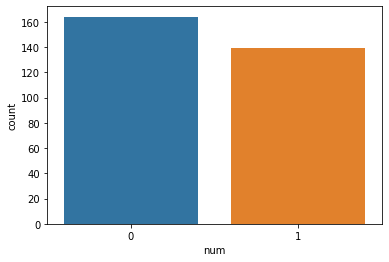

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#EXPLORING THE DATASET
import seaborn as sn
sn.countplot(x='num',data=dataset)
dataset.num.value_counts()


# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7868852459016393

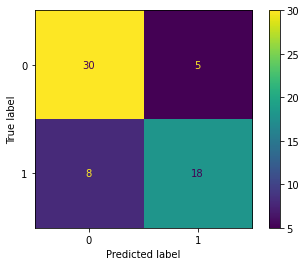

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [25]:
#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.78      0.69      0.73        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



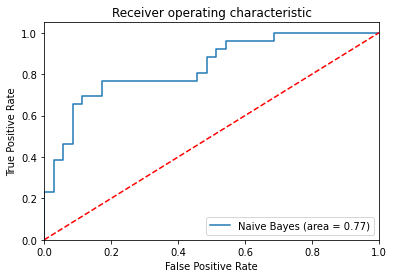

In [26]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()